In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import nbformat

In [2]:
with open("repositories.json") as file:
    repos = json.load(file)
repos[0]

{'id': 54346799,
 'node_id': 'MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==',
 'name': 'public-apis',
 'full_name': 'public-apis/public-apis',
 'private': False,
 'owner': {'login': 'public-apis',
  'id': 51121562,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUxMTIxNTYy',
  'avatar_url': 'https://avatars.githubusercontent.com/u/51121562?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/public-apis',
  'html_url': 'https://github.com/public-apis',
  'followers_url': 'https://api.github.com/users/public-apis/followers',
  'following_url': 'https://api.github.com/users/public-apis/following{/other_user}',
  'gists_url': 'https://api.github.com/users/public-apis/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/public-apis/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/public-apis/subscriptions',
  'organizations_url': 'https://api.github.com/users/public-apis/orgs',
  'repos_url': 'https://api.github.com/users/public-apis/repos',
  'events_url': 'ht

In [3]:
sizes = np.array([repo["size"] for repo in repos])
stargazers = np.array([repo["stargazers_count"] for repo in repos])
watchers = np.array([repo["watchers_count"] for repo in repos])
forks = np.array([repo["forks_count"] for repo in repos])
open_issues = np.array([repo["open_issues_count"] for repo in repos])
contributors = np.array([len(repo["total_contributors"]) for repo in repos])
contributions = np.array([sum([c["contributions"] for c in repo["total_contributors"]]) for repo in repos])
scores = np.array([repo["score"] for repo in repos])

df = pd.DataFrame({
    "size": sizes,
    "stargazers": stargazers,
    "watchers": watchers,
    "forks": forks,
    "open_issues": open_issues,
    "contributors": contributors,
    "contributions": contributions
})

df.head()

,size,stargazers,watchers,forks,open_issues,contributors,contributions
0,4997,292899,292899,31880,261,100,2825
1,11187,256128,256128,43682,424,100,299
2,6789,206176,206176,24499,418,100,1276
3,14990,179941,179941,43669,242,100,1744
4,330701,150343,150343,51363,715,12,374


Text(0, 0.5, '')

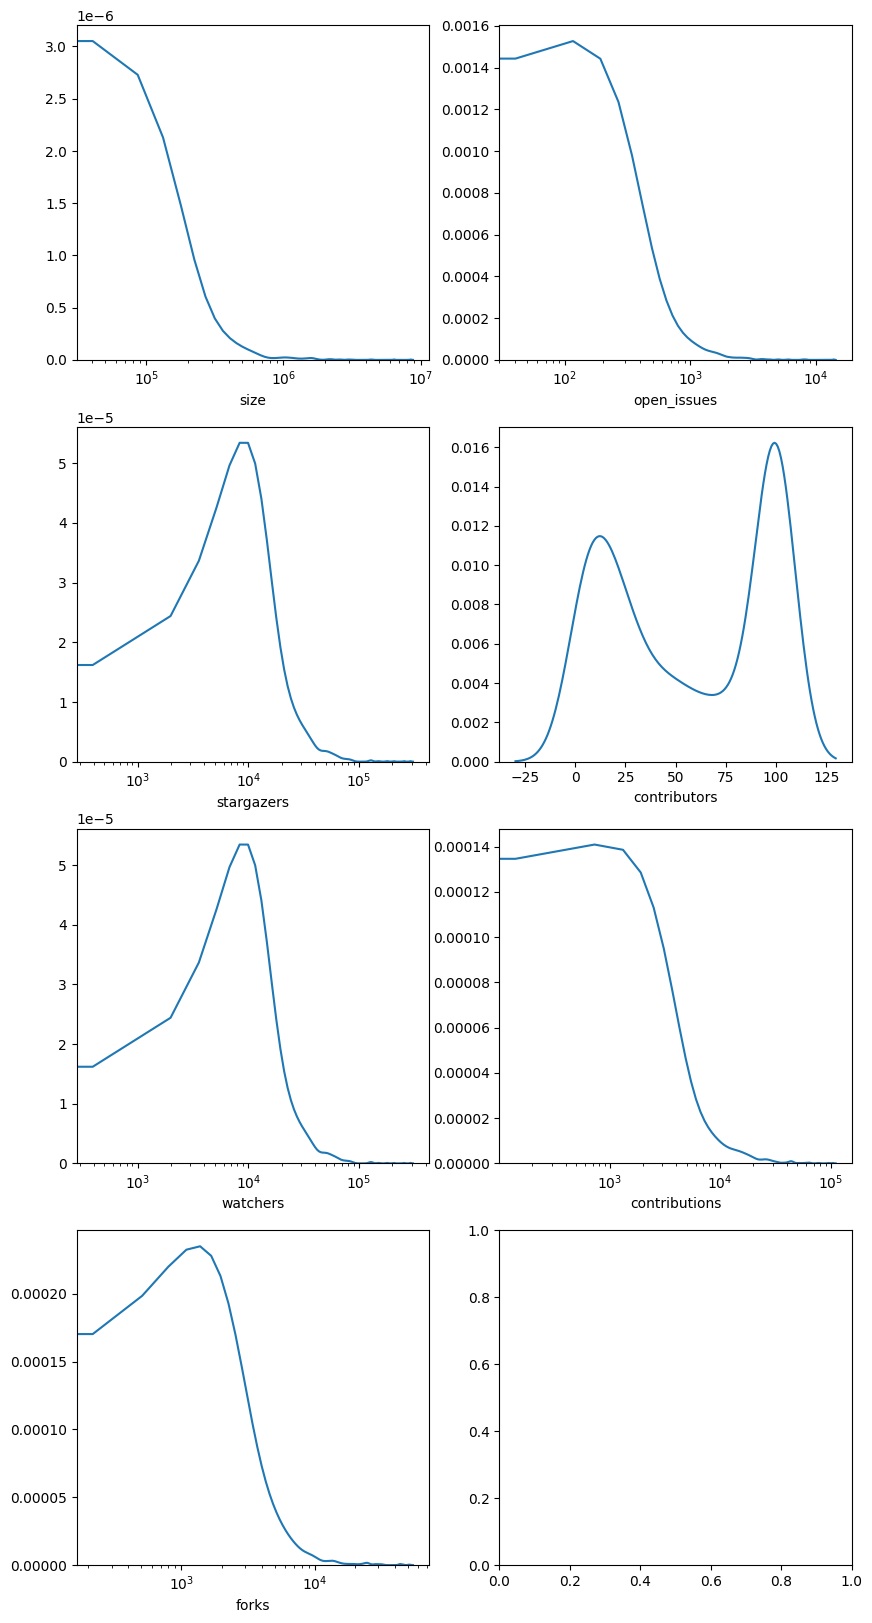

In [4]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(10, 20)

sns.kdeplot(data=df, x="size", ax=axs[0, 0])
axs[0, 0].set_xscale("log")

sns.kdeplot(data=df, x="stargazers", ax=axs[1, 0])
axs[1, 0].set_xscale("log")

sns.kdeplot(data=df, x="watchers", ax=axs[2, 0])
axs[2, 0].set_xscale("log")

sns.kdeplot(data=df, x="forks", ax=axs[3, 0])
axs[3, 0].set_xscale("log")

sns.kdeplot(data=df, x="open_issues", ax=axs[0, 1])
axs[0, 1].set_xscale("log")

sns.kdeplot(data=df, x="contributors", ax=axs[1, 1])
axs[1, 1].set_xscale("linear")

sns.kdeplot(data=df, x="contributions", ax=axs[2, 1])
axs[2, 1].set_xscale("log")

axs[0, 0].set_ylabel("")
axs[1, 0].set_ylabel("")
axs[2, 0].set_ylabel("")
axs[3, 0].set_ylabel("")
axs[0, 1].set_ylabel("")
axs[1, 1].set_ylabel("")
axs[2, 1].set_ylabel("")
axs[3, 1].set_ylabel("")

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_result, columns=["pca1", "pca2"])

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)
tsne_df = pd.DataFrame(tsne_result, columns=["tsne1", "tsne2"])

pca_fig = px.scatter(pca_df, x='pca1', y='pca2', title='PCA', hover_data=[df.index])
pca_fig.update_traces(customdata=df, hovertemplate="<b>%{customdata}:</b><br>%{text}")
tsne_fig = px.scatter(tsne_df, x='tsne1', y='tsne2', title='t-SNE')

pca_fig.show()
tsne_fig.show()